# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Is the distribution of body temperatures normal?


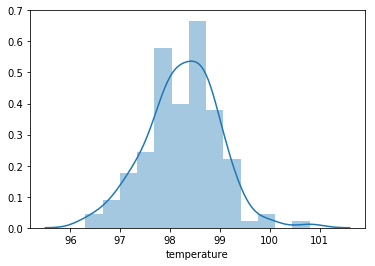

In [4]:
body_temp = df['temperature']
sns.distplot(body_temp)

By looking at the graph, we can see more datapoints near the median and less at the ends, which is patterns of normal distribution.

In [5]:
df.count()

temperature    130
gender         130
heart_rate     130
dtype: int64

Is the sample size large?
Is 130 people adequate for a sample size? Since we don't have the population ready, we can redirect our approach into confidence levels and margin of error.

For example, it's desirable to have a 95% confidence rate ± 5% as a margin of error.

For this to work we would need a minimum sample size to be 95 ± 5% confident.

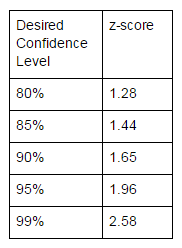


In [6]:
def samplesize(population, margin_of_error, z_score):
    stdev = 0.50
    x = (z_score**2) * (stdev) * (1-stdev)
    y = margin_of_error**2
    z = y*population
    a = x / y
    b = x / z
    samplesize = a / (1 + b)
    print("Recommended sample size: ", '%.0f' % samplesize)

Getting Margin of error and Z Score frm=om table above.

In [7]:
samplesize(1000000, 0.05, 1.96)

Recommended sample size:  384


So assuming that our population is at least 1 million people, we would need at least 384 respondants to be 95 ± 5% confident.

However, we only have 130 respondants. Thus, our sample size is too small for our desired parameters.

Let's change values for to 90 ± 10% confident from table above.

In [8]:
samplesize(1000000, 0.10, 1.65)

Recommended sample size:  68


our sample size is good for 90% confident.

# Are the observations independent?


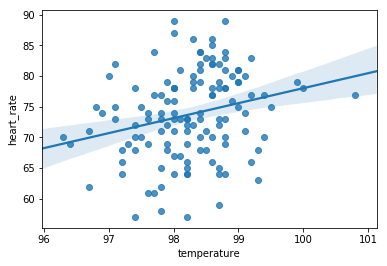

In [9]:
sns.regplot(df['temperature'], df['heart_rate'])

Looking at our regression plot there is no pattern shown by the data points. So we can say that the observations are independent due to high heart rates being independent to high temperatures.

# Is the true population mean really 98.6 degrees F?
Since we are assuming the population mean to be 98.6 degrees F, we can use a one sample t-test to see if there is a significant difference between 98.6 degrees F and the mean for this data set.

Null Hypothesis: The population mean is 98.6 degrees F. [no difference in mean]

Alternative Hypothesis: The population mean is less than 98.6 degrees F. [difference in mean]

Since our p-value is less than 0.01, we can reject our null hypothesis with 99% confidence.

In [10]:
import scipy.stats as stats

In [11]:
stats.ttest_1samp(df['temperature'], popmean=98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

# At what temperature should we consider someone's temperature to be "abnormal"?
Since we are already getting an idea of the average temperatures for men and women, we can make an inference on when body temperature is getting abnormal. Rather than taking a biological approach, we are going to take a look at confidence intervals and margin of error. Here, we are aiming for 95% confidence.

Thus, we can say that we are 95% confident that: the human body temperature is 98.25 ± 1.44 degrees F or is between 96.81 to 99.68 degrees F.

Anything outside those intervals is considered statistically "abnormal".

In [12]:
df.temperature.mean()

98.24923076923078

In [13]:
low, high = stats.norm.interval(0.95, loc=df.temperature.mean(), scale=df.temperature.std())

In [14]:
margin_of_error = df.temperature.mean() - low

In [15]:
print("low = %f"%low," high = %f" %high , "margin_of_error = %f"  %margin_of_error)

low = 96.812218  high = 99.686243 margin_of_error = 1.437013


# Is there at difference between male and female body temperature?
Let's try a 2-sample t-test to see if male body temperatures are significantly different compared to female body temperatures.

Null Hypothesis: Males and females have the same body temperature. [no difference in mean]

Alternative Hypothesis: Males and females have difference body temperatures. [difference in mean]

Since our p-value is less than 0.05, we can reject our null hypothesis with 95% confidence.

In [16]:
temp_gender_df = df[['temperature', 'gender']]
male_temp = temp_gender_df[temp_gender_df.gender=='M']
female_temp = temp_gender_df[temp_gender_df.gender=='F']
stats.ttest_ind(male_temp['temperature'],female_temp['temperature'])

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

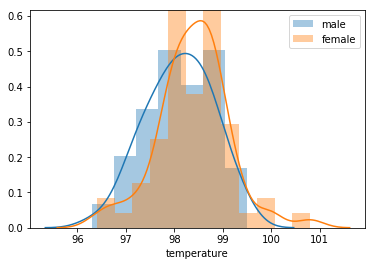

In [17]:
sns.distplot(male_temp['temperature'], label='male')
sns.distplot(female_temp['temperature'], label='female')
plt.legend()

# Conclusions
What is the True Normal Human Body Temperature?
The true body normal human body temperature is 98.25 ± 1.44 degrees F with 95% confidence.

# Is the distribution of body temperatures normal?
For this dataset, yes.

# Is the sample size large?
Assuming that the population size is about 1 million people, we can say that it is with 90% confidence.

# Are the observations independent?
Yes, body temperatures are independent to heartrate.

# Is the true population mean really 98.6 degrees F?
No. The true population is less than 98.6 degrees F with 99% confidence.

# At what temperature should we consider someone's temperature to be "abnormal"?
Statistically, anything above or below 96.81 to 99.68 degrees F at 95% confidence.

# Is there at difference between male and female body temperature?
Yes. Females are warmer than males with 95% confidence. 
# Discussion
37 degrees C or 98.6 degrees F is a very fair estimate for a study published in the 1800's. However, with all of the statistics that we have today, we can do better than that. We found the true normal body temperature with confidence. We ensured that our data was normally distributed. We checked that our sample size was large enough to represent at least 1 million people. We concluded that less than the published 98.6 degrees F, with confidence. We also found what we can consider "abnormal" temperatures. Finally, we even concluded that females are warmer than males. This study is showing how we can consistently make improvements to research studies in the past. Even though the past estimate was very close, we were able to make it even better with what we have today.